# Notes - race and ethnicity


In [1]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from graphviz import Digraph
from sympy.physics.units import magnetic_density
from variables import Variables as vars

plt.style.use("../../notebook.mplstyle")

os.makedirs("./outputs", exist_ok=True)

In [2]:
con = duckdb.connect("./data/us_births.db", read_only=True)

In [ ]:
race_df = con.execute(
    """
    SELECT
        year,
        COUNT(*) as total,
        COUNT(mrace_c),
        COUNT(mrace),
        COUNT(mracerec),
        COUNT(mraceimp),
        COUNT(mbrace),
        COUNT(mrace31),
        COUNT(mrace6),
        COUNT(mrace15),
        COUNT(umhisp),
        COUNT(mhispx),
        COUNT(mhisp_r),
        COUNT(mracehisp),
        COUNT(orracem)
    FROM
        us_births
    WHERE
        year >= 1989
    GROUP BY year
    ORDER BY year
    """
).df()

race_df.to_csv(
    f"./outputs/race_counts_by_year_{pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')}.csv"
)
race_df

,year,total,count(mrace_c),count(mrace),count(mracerec),count(mraceimp),count(mbrace),count(mrace31),count(mrace6),count(mrace15),count(umhisp),count(mhispx),count(mhisp_r),count(mracehisp),count(orracem)
0,1989,4045693,4045693,4045693,0,14781,0,0,0,0,0,0,0,0,4045693
1,1990,4162917,4162917,4162917,0,12625,0,0,0,0,0,0,0,0,4162917
2,1991,4115342,4115342,4115342,0,12884,0,0,0,0,0,0,0,0,4115342
3,1992,4069428,4069428,4069428,0,16171,0,0,0,0,0,0,0,0,4069428
4,1993,4004523,4004523,4004523,0,17761,0,0,0,0,0,0,0,0,4004523
5,1994,3956925,3956925,3956925,0,21723,0,0,0,0,0,0,0,0,3956925
6,1995,3903012,3903012,3903012,0,23469,0,0,0,0,0,0,0,0,3903012
7,1996,3894874,3894874,3894874,0,27455,0,0,0,0,0,0,0,0,3894874
8,1997,3884329,3884329,3884329,0,27927,0,0,0,0,0,0,0,0,3884329
9,1998,3945192,3945192,3945192,0,28627,0,0,0,0,0,0,0,0,3945192


In [ ]:
mrace_c_counts_df = (
    con.execute(
        """
        SELECT *
        FROM(
            SELECT year, mrace_c
            FROM us_births
            WHERE down_ind = 1
        )
        PIVOT(
            COUNT(*)
            FOR mrace_c IN(1, 2, 3, 4)
        )
        ORDER BY year;
        """
    )
    .df()
    .dropna()
    .set_index(vars.YEAR)
)

mrace_c_counts_df.to_csv(
    f"./outputs/mrace_c_counts_{pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')}.csv"
)
mrace_c_counts_df

In [ ]:
mrace_c_counts_ds_df = (
    con.execute(
        """
        SELECT *
        FROM(
            SELECT year, mrace_c
            FROM us_births
            WHERE down_ind = 1
        )
        PIVOT(
            COUNT(*)
            FOR mrace_c IN(1, 2, 3, 4)
        )
        ORDER BY year;
        """
    )
    .df()
    .dropna()
    .set_index(vars.YEAR)
)

mrace_c_counts_ds_df.to_csv(
    f"./outputs/mrace_c_counts_ds_{pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')}.csv"
)
mrace_c_counts_ds_df

In [ ]:
mrace_c_totals_df = (
    con.execute(
        """
        SELECT 
        mrace_c,
        AVG(down_ind),
        AVG(p_ds_lb_nt),
        AVG(p_ds_lb_wt)
        FROM us_births
        GROUP BY mrace_c;
        """
    )
    .df()
    .dropna()
)
mrace_c_totals_df["mrace_c"] = mrace_c_totals_df["mrace_c"].map(
    {1: "White", 2: "Black", 3: "AI/AN", 4: "Asian/PI"}
)
mrace_c_totals_df

,mrace_c,avg(down_ind),avg(p_ds_lb_nt),avg(p_ds_lb_wt)
1,White,0.000623,0.001823,0.001214
2,Black,0.000393,0.001592,0.001216
3,AI/AN,0.000695,0.001444,0.001220
4,Asian/PI,0.000393,0.002506,0.001237


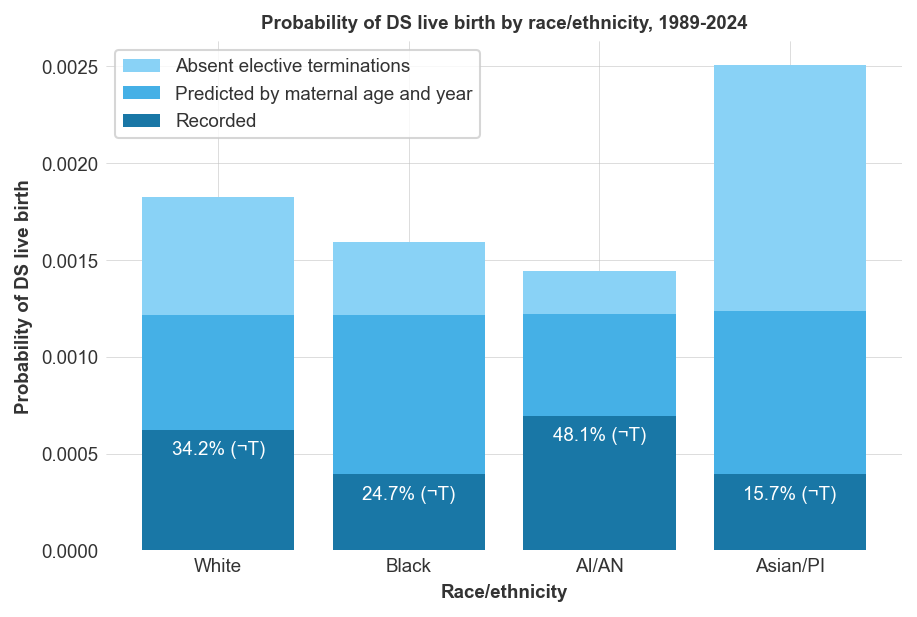

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Probability of DS live birth by race/ethnicity, 1989-2024")
plt.xlabel("Race/ethnicity")
plt.ylabel("Probability of DS live birth")
plt.bar(
    mrace_c_totals_df["mrace_c"],
    mrace_c_totals_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations",
)
plt.bar(
    mrace_c_totals_df["mrace_c"],
    mrace_c_totals_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted by maternal age and year",
)
plt.bar(
    mrace_c_totals_df["mrace_c"],
    mrace_c_totals_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in mrace_c_totals_df.iterrows():
    plt.text(
        i - 1,
        row["avg(down_ind)"] - 0.00015,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
    )
plt.legend()

In [74]:
mrace_c_totals_2004_df = (
    con.execute(
        """
        SELECT 
        mrace_c,
        AVG(down_ind),
        AVG(p_ds_lb_nt),
        AVG(p_ds_lb_wt)
        FROM us_births
        WHERE year >= 2004
        GROUP BY mrace_c;
        """
    )
    .df()
    .dropna()
)
mrace_c_totals_2004_df["mrace_c"] = mrace_c_totals_2004_df["mrace_c"].map(
    {1: "White", 2: "Black", 3: "AI/AN", 4: "Asian/PI"}
)
mrace_c_totals_2004_df

,mrace_c,avg(down_ind),avg(p_ds_lb_nt),avg(p_ds_lb_wt)
1,White,0.000674,0.001980,0.001284
2,Black,0.000469,0.001781,0.001285
3,AI/AN,0.000810,0.001527,0.001283
4,Asian/PI,0.000414,0.002720,0.001287


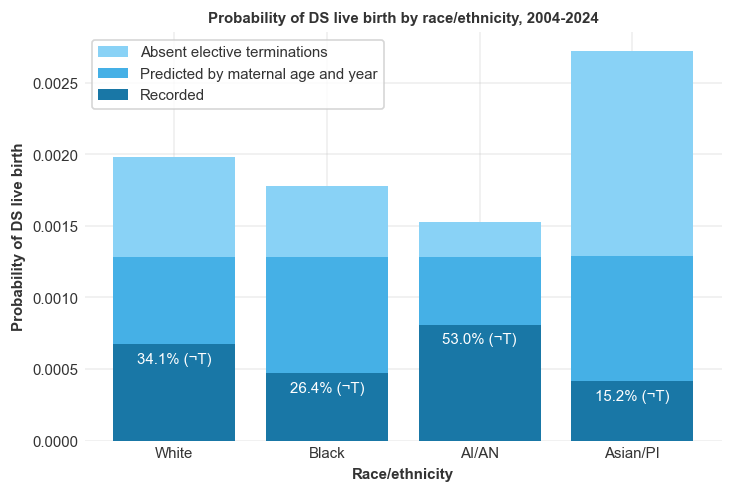

In [99]:
plt.figure(figsize=(6, 4))
plt.title("Probability of DS live birth by race/ethnicity, 2004-2024")
plt.xlabel("Race/ethnicity")
plt.ylabel("Probability of DS live birth")
plt.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations",
)
plt.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted by maternal age and year",
)
plt.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in mrace_c_totals_2004_df.iterrows():
    plt.text(
        i - 1,
        row["avg(down_ind)"] - 0.00015,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
    )
plt.legend()

In [100]:
mrace_c_totals_1989_df = (
    con.execute(
        """
        SELECT 
        mrace_c,
        AVG(down_ind),
        AVG(p_ds_lb_nt),
        AVG(p_ds_lb_wt)
        FROM us_births
        WHERE year < 2004
        GROUP BY mrace_c;
        """
    )
    .df()
    .dropna()
)
mrace_c_totals_1989_df["mrace_c"] = mrace_c_totals_1989_df["mrace_c"].map(
    {1: "White", 2: "Black", 3: "AI/AN", 4: "Asian/PI"}
)
mrace_c_totals_1989_df

,mrace_c,avg(down_ind),avg(p_ds_lb_nt),avg(p_ds_lb_wt)
0,White,0.000561,0.001616,0.001123
1,Black,0.000296,0.001329,0.001121
2,AI/AN,0.000532,0.001318,0.001125
3,Asian/PI,0.000350,0.002052,0.001130


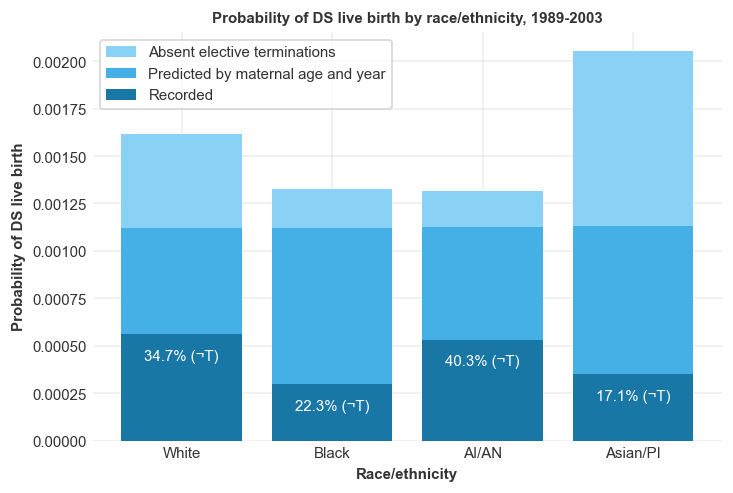

In [101]:
plt.figure(figsize=(6, 4))
plt.title("Probability of DS live birth by race/ethnicity, 1989-2003")
plt.xlabel("Race/ethnicity")
plt.ylabel("Probability of DS live birth")
plt.bar(
    mrace_c_totals_1989_df["mrace_c"],
    mrace_c_totals_1989_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations",
)
plt.bar(
    mrace_c_totals_1989_df["mrace_c"],
    mrace_c_totals_1989_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted by maternal age and year",
)
plt.bar(
    mrace_c_totals_1989_df["mrace_c"],
    mrace_c_totals_1989_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in mrace_c_totals_1989_df.iterrows():
    plt.text(
        i,
        row["avg(down_ind)"] - 0.00015,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
    )
plt.legend()

C:\Users\FrankBuckley\AppData\Local\Temp\ipykernel_52188\1925868238.py:83: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0, 1, 0.9])


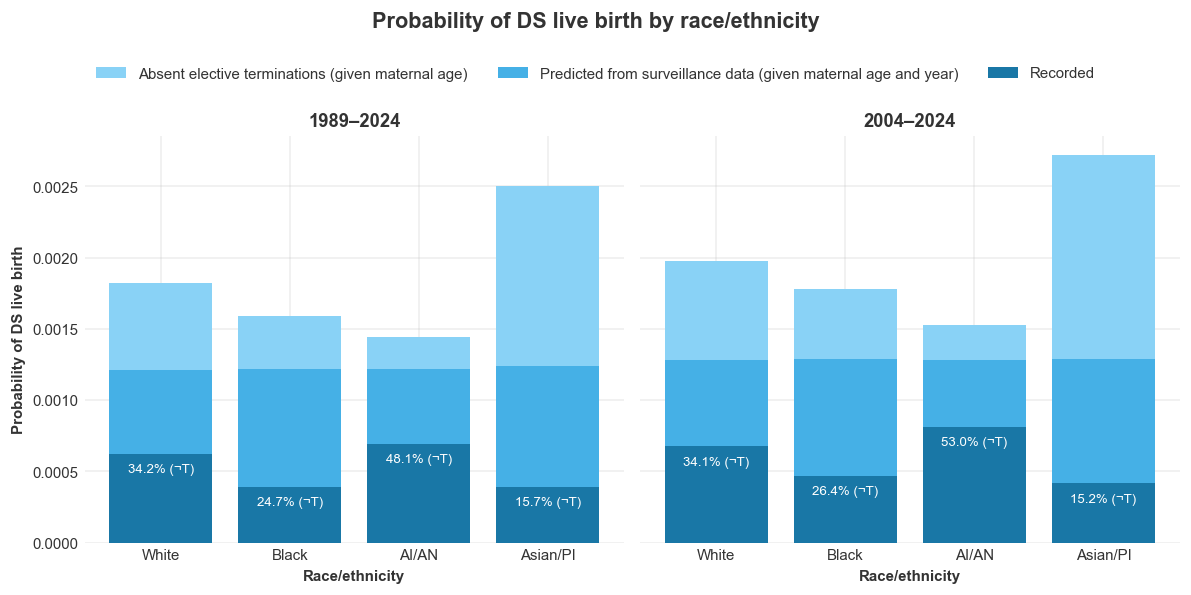

In [108]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

fig.suptitle("Probability of DS live birth by race/ethnicity", fontsize=13, fontweight="bold", y=0.98)

ax = axs[0]
ax.set_title("1989–2024", fontsize=11)
ax.set_xlabel("Race/ethnicity")
ax.set_ylabel("Probability of DS live birth")

bars1 = ax.bar(
    mrace_c_totals_df["mrace_c"],
    mrace_c_totals_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations (given maternal age)",
)
bars2 = ax.bar(
    mrace_c_totals_df["mrace_c"],
    mrace_c_totals_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted from surveillance data (given maternal age and year)",
)
bars3 = ax.bar(
    mrace_c_totals_df["mrace_c"],
    mrace_c_totals_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in mrace_c_totals_df.iterrows():
    ax.text(
        i - 1,
        row["avg(down_ind)"] - 0.00015,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )

ax = axs[1]
ax.set_title("2004–2024", fontsize=11)
ax.set_xlabel("Race/ethnicity")

ax.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
)
ax.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
)
ax.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(down_ind)"],
    color="#1977a6",
)
for i, row in mrace_c_totals_2004_df.iterrows():
    ax.text(
        i - 1,
        row["avg(down_ind)"] - 0.00015,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )

# --- Shared legend (below title, above plots) ---
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.91),
    ncol=3,
    frameon=False,
    fontsize=9,
)

fig.tight_layout(rect=[0, 0, 1, 0.9])

